In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.signal import hamming
from scipy.spatial.distance import cdist

import IPython.display as ipd
from mdct.fast import mdct, imdct
from scipy.io.wavfile import write

plt.rcParams['figure.figsize'] = (12,8)

In [3]:
# useful functions

def plot_sound(data, rate, title=None):
    if data.ndim == 1:
        data = data[:,np.newaxis]
    times = np.arange(data.shape[0])/rate
    plt.figure(figsize=(30,6))
    for channel in data.T:
        plt.fill_between(times, channel)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(times[0], times[-1])
    if title:
        plt.title(title)
    plt.show()
    
def play_sound(data, rate):
    return ipd.Audio(data.T, rate=rate)

## 1)

T = 220501, M = 2


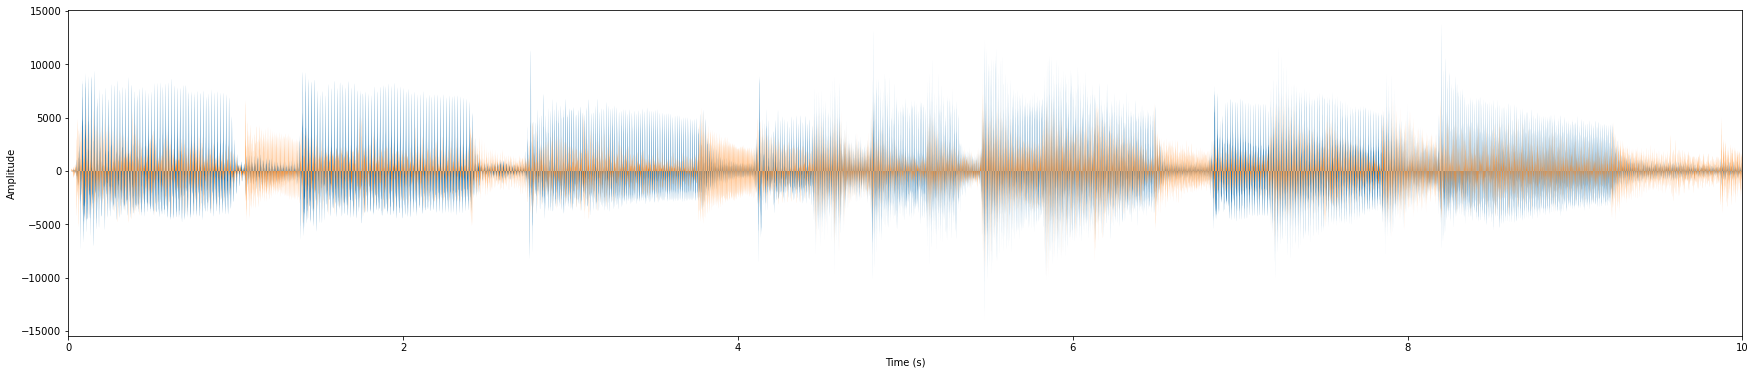

In [6]:
#Importing the sound+putting it in a matrix

fname = 'mix.wav'

rate, x = wavfile.read(fname)
print('T = {:d}, M = {:d}'.format(*x.shape))
plot_sound(x, rate)
play_sound(x, rate)

In [4]:
write('new_mix.wav', rate, np.array(x, dtype=np.int16)) # to write a new wave file

<b>Answer:</b> xxx

## 2)

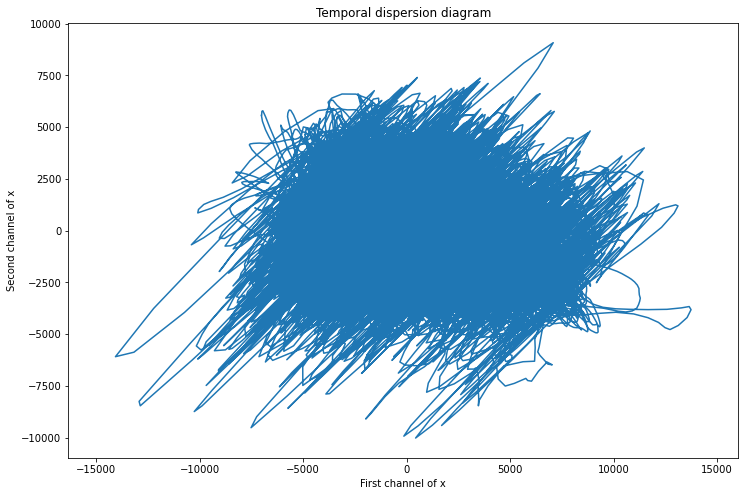

In [19]:
#Plotting the temporal dispersion diagram

plt.plot(x[:, 0], x[:, 1])
plt.axis('equal')
plt.xlabel('First channel of x')
plt.ylabel('Second channel of x')
plt.title('Temporal dispersion diagram')
plt.show()

<b>Answer:</b> We cannot disinguish any direction in this representation.

## 3)

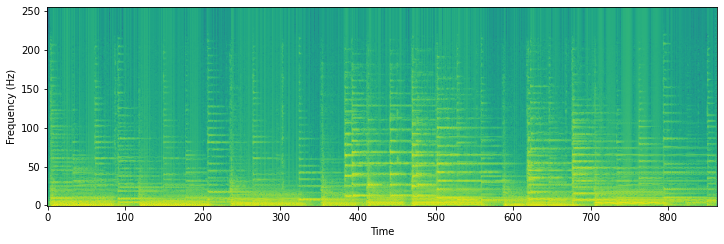

In [20]:
#Computing the MDCT
X = mdct(x, window=hamming, framelength=512)
Z = X.view(dtype=np.complex128)[...,0]

#Norm
X_norm = np.abs(Z)**2

#Plotting
plt.imshow(np.log(X_norm+1e-10), origin='lower')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

## 4)

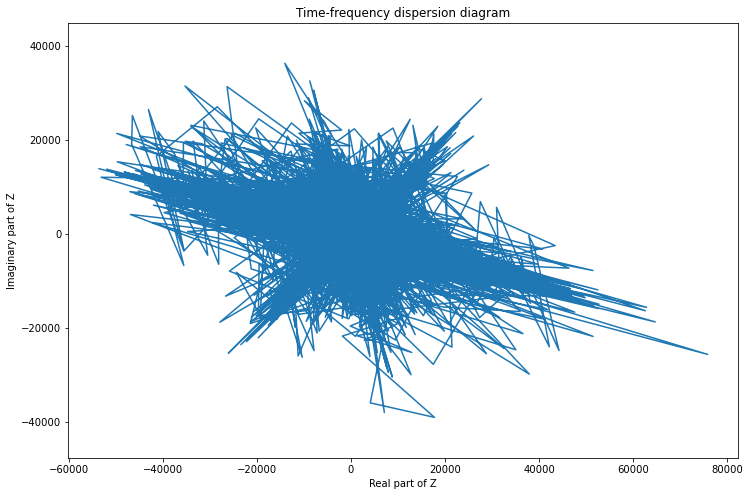

In [22]:
#Processing for plotting
Z_plot = np.reshape(Z, (1,-1))[0]

#Plotting
plt.plot(Z_plot.real, Z_plot.imag)
plt.axis('equal')
plt.xlabel('Real part of Z')
plt.ylabel('Imaginary part of Z')
plt.title('Time-frequency dispersion diagram')
plt.show()

<b>Answer:</b> As seen in the course, the sources do not overlap in the frequency domain. Therefore, we can actually see the directions after having computed the MDCT.

## 5)